# CNN 
Proposed CNN training and testing using 8-channel EEG data 

In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io as sio
from mat4py import loadmat 
from tensorflow import keras
#from keras import utils
import time
import glob
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [4]:
np.random.seed(816)
device = tf.test.gpu_device_name()

In [13]:
folder = 'filtered_P300/*.mat'
files = glob.glob(folder)

# CNN Model

In [2]:
import tensorflow as tf

from tensorflow import keras
tf.keras.backend.clear_session()  # For easy reset of notebook state.

from tensorflow.keras import layers

input_layer = keras.Input(shape = (351,8,1), name='main_input')
x     = layers.Conv2D(16, 8, padding='same', activation='relu')(input_layer)
x     = layers.Conv2D(32, 6, padding='same', activation='relu')(x)
x     = layers.Conv2D(8, 4, padding='same', activation='relu')(x)
x     = layers.Conv2D(4, 2, padding='same', activation='relu')(x)
x     = layers.GlobalAveragePooling2D()(x)
x     = layers.Dense(8)(x)
x     = layers.Dense(64)(x)
output = layers.Dense(2, activation='softmax')(x)

model = keras.Model(inputs=input_layer, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 351, 8, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 351, 8, 16)        1040      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 351, 8, 32)        18464     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 351, 8, 8)         4104      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 351, 8, 4)         132       
_________________________________________________________________
global_average_pooling2d (Gl (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 8)                 40    

In [13]:
#compiling the model
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=True)  # default params
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [14]:
def train_net(model):
  appX = []
  appy = []
  init = time.time()
  for file in files:
    X, Y, Trials, Flash = prepare_data(file)
    X_clean, y_clean = clean_data(X, Y, Flash)
    appX.append(X_clean)
    appy.append(y_clean)

  X = [subject for subject in appX]
  y = [subject for subject in appy]
  X_train, X_valid, y_train, y_valid = train_test_split(np.vstack(X), np.vstack(y), test_size=0.1, random_state=816)
  history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=30, epochs=75, verbose=1)
  end = time.time()
  print("time elapsed training is:", (end - init)/60, " minutes")  
  return history.history['accuracy'], history.history['val_accuracy'], history.history['loss'], history.history['val_loss']

In [15]:
acc, val_acc, loss, val_loss = train_net(model)

Epoch 1/75
286/286 [==============================] - 92s 320ms/step - loss: 0.6937 - accuracy: 0.4965 - val_loss: 0.6931 - val_accuracy: 0.5042
Epoch 2/75
286/286 [==============================] - 89s 312ms/step - loss: 0.6934 - accuracy: 0.4986 - val_loss: 0.6932 - val_accuracy: 0.5042
Epoch 3/75
286/286 [==============================] - 90s 316ms/step - loss: 0.6933 - accuracy: 0.4986 - val_loss: 0.6939 - val_accuracy: 0.4958
Epoch 4/75
286/286 [==============================] - 1581s 6s/step - loss: 0.6934 - accuracy: 0.4977 - val_loss: 0.6931 - val_accuracy: 0.5042
Epoch 5/75
286/286 [==============================] - 85s 297ms/step - loss: 0.6934 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.4958
Epoch 6/75
286/286 [==============================] - 97s 338ms/step - loss: 0.6933 - accuracy: 0.4937 - val_loss: 0.6931 - val_accuracy: 0.5042
Epoch 7/75
286/286 [==============================] - 96s 334ms/step - loss: 0.6932 - accuracy: 0.5032 - val_loss: 0.6931 - val_acc

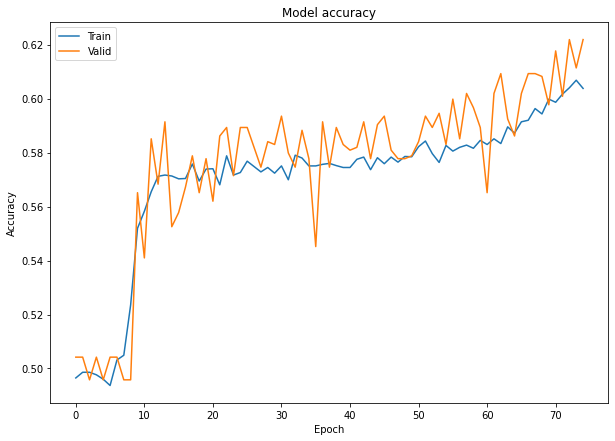

In [16]:
# Plot train and val accuracy values
plt.rcParams["figure.figsize"] = (10,7)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()


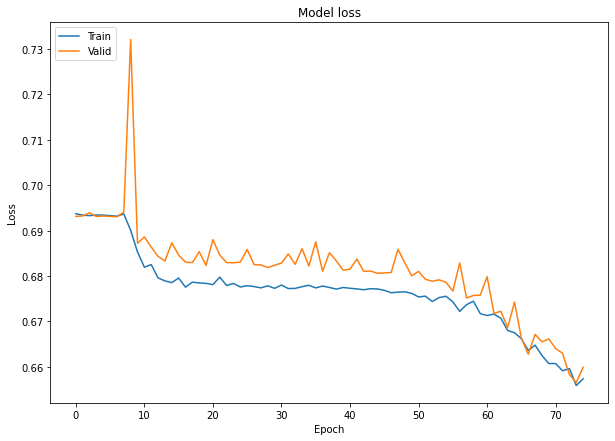

In [17]:
# Plot train and validation accuracy values
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()


In [18]:
X, Y, Trials, Flash = prepare_data(test_file)
X_clean, y_clean = clean_data(X, Y, Flash)
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.1, random_state=816)
history = model.fit(X_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
1224/1224 [==============================] - 17s 14ms/step - loss: 0.6328 - accuracy: 0.6299
Epoch 2/20
1224/1224 [==============================] - 18s 15ms/step - loss: 0.5611 - accuracy: 0.7467
Epoch 3/20
1224/1224 [==============================] - 19s 15ms/step - loss: 0.5310 - accuracy: 0.7541
Epoch 4/20
1224/1224 [==============================] - 18s 15ms/step - loss: 0.5306 - accuracy: 0.7590
Epoch 5/20
1224/1224 [==============================] - 19s 16ms/step - loss: 0.5035 - accuracy: 0.7778
Epoch 6/20
1224/1224 [==============================] - 19s 16ms/step - loss: 0.4995 - accuracy: 0.7737
Epoch 7/20
1224/1224 [==============================] - 18s 15ms/step - loss: 0.4967 - accuracy: 0.7859
Epoch 8/20
1224/1224 [==============================] - 19s 15ms/step - loss: 0.4903 - accuracy: 0.7810
Epoch 9/20
1224/1224 [==============================] - 20s 17ms/step - loss: 0.4954 - accuracy: 0.7721
Epoch 10/20
1224/1224 [==============================] - 18s 15m

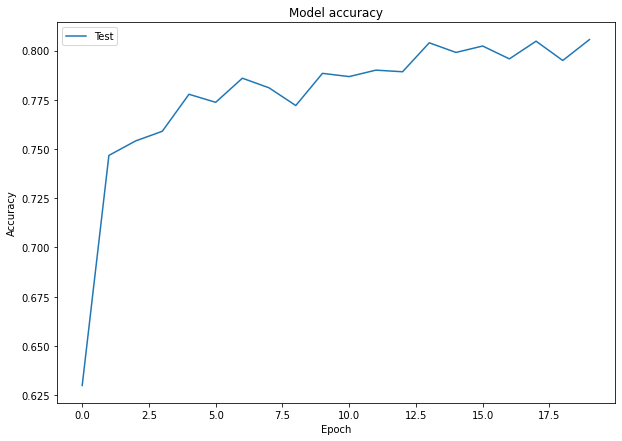

In [19]:
# Plot test accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper left')
plt.show()


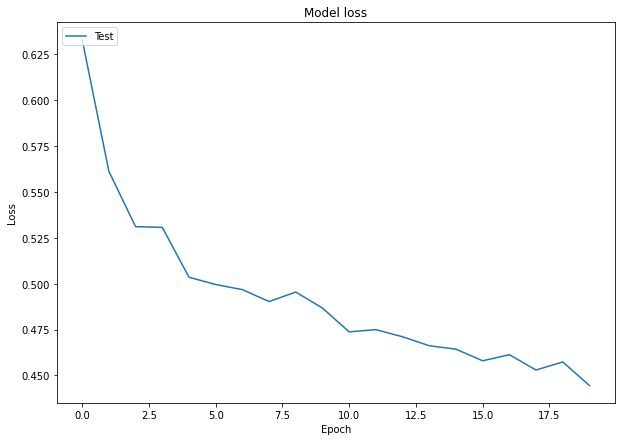

In [20]:
# Plot test loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper left')
plt.show()

In [21]:
score = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 60ms/step - loss: 0.5632 - accuracy: 0.7426


In [22]:
init = time.time()
preds = model.predict(X_test)
end = time.time()
print("time elapsed for each trial is:",(end - init)/X_test.shape[0] * 1000, "ms")

time elapsed for each trial is: 3.940882051692289 ms


In [23]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))

In [24]:
matrix_norm = np.zeros((2,2))
for i in range(2):
  matrix_norm[i] = matrix[i]/matrix[i].sum(axis=0)

In [28]:
model.save('CNNwithAdam.h5') 

# Load model

In [4]:
new_model = tf.keras.models.load_model('CNNwithAdam.h5')

In [7]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 351, 8, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 351, 8, 16)        1040      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 351, 8, 32)        18464     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 351, 8, 8)         4104      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 351, 8, 4)         132       
_________________________________________________________________
global_average_pooling2d (Gl (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 8)                 40    

In [15]:
history = new_model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1224/1224 [==============================] - 18s 15ms/step - loss: 0.4444 - accuracy: 0.8088
Epoch 2/10
1224/1224 [==============================] - 19s 15ms/step - loss: 0.4417 - accuracy: 0.8178
Epoch 3/10
1224/1224 [==============================] - 19s 15ms/step - loss: 0.4338 - accuracy: 0.8219
Epoch 4/10
1224/1224 [==============================] - 19s 16ms/step - loss: 0.4369 - accuracy: 0.8121
Epoch 5/10
1224/1224 [==============================] - 19s 16ms/step - loss: 0.4308 - accuracy: 0.8129
Epoch 6/10
1224/1224 [==============================] - 19s 15ms/step - loss: 0.4234 - accuracy: 0.8088
Epoch 7/10
1224/1224 [==============================] - 19s 15ms/step - loss: 0.4171 - accuracy: 0.8203
Epoch 8/10
1224/1224 [==============================] - 19s 15ms/step - loss: 0.4004 - accuracy: 0.8276
Epoch 9/10
1224/1224 [==============================] - 19s 15ms/step - loss: 0.4099 - accuracy: 0.8154
Epoch 10/10
1224/1224 [==============================] - 19s 16m

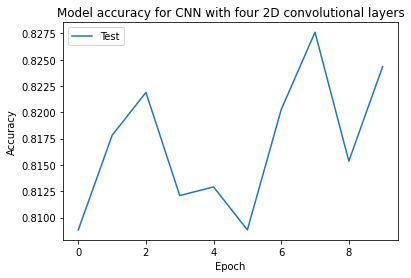

In [23]:
# Plot test accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy for CNN with four 2D convolutional layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper left')
plt.show()

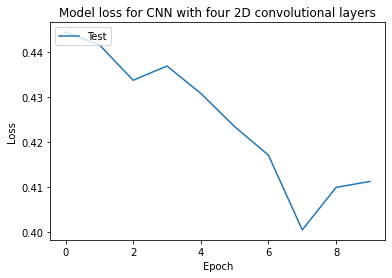

In [22]:
plt.plot(history.history['loss'])
plt.title('Model loss for CNN with four 2D convolutional layers')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper left')
plt.show()